In [ ]:
#Antiferromnagnetic

import numpy as np
import matplotlib.pyplot as plt

# Lattice generation
s_ = [1, -1]
N = 10  # Lattice size

lattice = np.random.choice(s_, size=(N, N))

lower_temp = 0.5
upper_temp = 7
temp_pts = 200
t_limit = 2000
limit = 9000

In [ ]:
# Restriction Calc updated

def energyCalc(lattice, N):
    ener = 0
    for i in range(N):
        for j in range(N):
            s = lattice[i,j]
            nb = lattice[(i+1)%N,j] + lattice[i,(j+1)%N] + lattice[(i-1)%N,j] + lattice[i,(j-1)%N] + lattice[(i+1)%N,(j+1)%N] + lattice[(i-1)%N,(j-1)%N]
            ener += s*nb
    return -ener

In [ ]:
#Magnetization Calculations

def magCalc(lattice):
    mag = np.sum(lattice)
    return mag

In [ ]:
#Monte Carlo Steps - Metropolis Algorithm

def mc_steps(lattice, beta):
    for i in range(N):
        (a,b) = np.random.randint(0, N, size=2)
        s = lattice[a,b]
        n_b = lattice[(a+1)%N,b] + lattice[a,(b+1)%N] + lattice[(a-1)%N,b] + lattice[a,(b-1)%N] + lattice[(a+1)%N,(b+1)%N] + lattice[(a-1)%N,(b-1)%N]
        delta_restriction = -2*s*n_b
        if delta_restriction < 0:
          s *= -1
        elif np.random.rand() < np.exp(-delta_restriction*beta):
          s *= -1
        lattice[a,b] = s
    return lattice

In [ ]:
Temperatures = np.linspace(lower_temp,upper_temp,temp_pts)

In [ ]:
#main code

energy_arr = []
mag_arr = []
C_arr = []
X_arr = []

t_limit = 1000
limit = 9000
for temp in Temperatures:
    ener = 0
    magn = 0
    ener2 = 0
    magn2 = 0

    l = np.copy(lattice)
    beta = 1/temp
    for t in range(t_limit):
        mc_steps(l,beta)
    for z in range(limit):
        mc_steps(l,beta)
        e = energyCalc(l,N)
        m = magCalc(l)

        ener += e
        ener2 += e**2
        magn += m
        magn2 += m**2

    energy_arr.append(ener/(N*N*limit))
    C_arr.append(((ener2/(N*N*limit) - ((ener*ener)/(N*N*limit*limit)))*(beta**2)))
    mag_arr.append(magn/(N*N*limit))
    X_arr.append(((magn2/(N*N*limit) - ((magn*magn)/(N*N*limit*limit)))*(beta)))

(np.float64(0.175),
 np.float64(7.325),
 np.float64(0.06058487037313226),
 np.float64(0.28704587977647045))

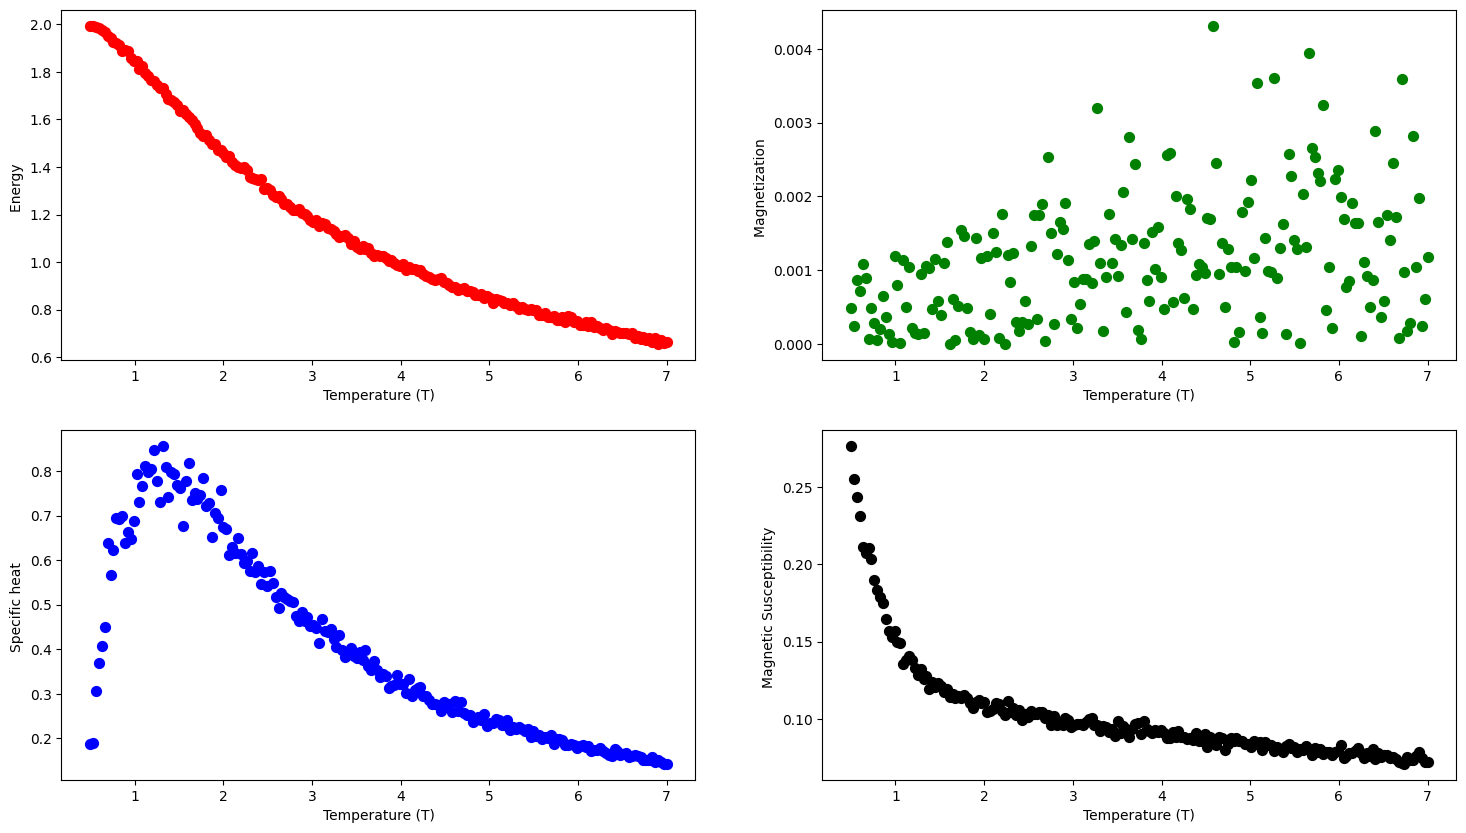

In [ ]:
f = plt.figure(figsize=(18, 10))

sp =  f.add_subplot(2, 2, 1 )
plt.scatter(Temperatures, energy_arr, s=10, marker='o', color='red')
plt.xlabel("Temperature (T)")
plt.ylabel("Energy ")
plt.axis('tight')

sp =  f.add_subplot(2, 2, 3 )
plt.scatter(Temperatures, C_arr, s=10, marker='o', color='blue')
plt.xlabel("Temperature (T)")
plt.ylabel("Specific heat ")
plt.axis('tight')

sp =  f.add_subplot(2, 2, 2 )
plt.scatter(Temperatures, np.abs(mag_arr), s=10, marker='o', color='green')
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization ")
plt.axis('tight')

sp =  f.add_subplot(2, 2, 4 )
plt.scatter(Temperatures, X_arr, s=10, marker='o', color='black')
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetic Susceptibility ")
plt.axis('tight')